# NAME - SOHIT PATHAK


# ROLL NO. - MA22M019

QUESTION -2 IS BELOW TO Q-1

# QUESTION- 1

 Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (3, 7). You can assume the start point to be (2, 5). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def f(w):       # Our Function
    return (w[0]-10)**2+(w[1]-10)**2
def gradf(w):         # Gardiant of given function 
    return np.array([2*(w[0]-10),2*(w[1]-10)])

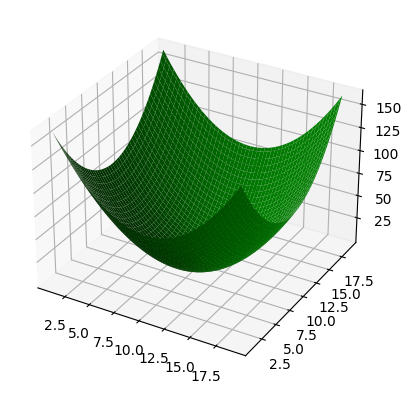

In [31]:
x=np.linspace(1,19,100)
y=np.linspace(1,19,100)
xx,yy=np.meshgrid(x,y)
zz=f(np.array([xx,yy]))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,zz,color='g')
plt.show()

In [32]:
p=np.array([3,7])  # Given Direction 
w_0=np.array([2,5])  # Our Initial guess 
if np.dot(gradf(w_0),p)<0:  
    print('Given direction P=[3,7] is the descent direction')

Given direction P=[3,7] is the descent direction


In [38]:
# Backtracking Algorithm 
def Bracketing(alpha):  # Unidirection function 
    return f(w_0+alpha*p)
a=0.1;b=3  #Initial guess
n=25  # number of subintervals
delw=(b-a)/n
w_1=a
w_2=a+delw
w_3=w_2+delw
while Bracketing(w_1)<Bracketing(w_2) or Bracketing(w_2)>Bracketing(w_3):
    w_1=w_2
    w_2=w_3
    w_3=w_2+delw
    if w_3>b:
        print('Minimum does not lies in (a,b)')
        break
print("The minimum of function  will lies in between {} and {}".format(w_1,w_3))

The minimum of function  will lies in between 0.9119999999999999 and 1.1440000000000001


In [34]:
#Interval Halving or Region elimination method 
a=w_1
b=w_3
L=(b-a)
epsilon=10**-4 # tolarence
w_m=(w_1+w_2)/2
w_1=a+L/4  
w_2=b-L/4
while abs(L)>epsilon:
    if f(w_0+w_1*p)<f(w_0+w_m*p):
        b=w_m
        w_m=w_1
    else:
        if f(w_0+w_2*p)<f(w_0+w_m*p):
            a=w_m
            w_m=w_2
        else:
            a=w_1
            b=w_2
    L=b-a
    w_1=a+L/4
    w_2=b-L/4
print(w_m)
print("Minimum value of function along the given direction is :",f(w_0+w_m*p))

0.999
Minimum value of function along the given direction is : 29.002058


In [35]:
print('Location of the minimum along the search direction ',w_0+w_m*p)

Location of the minimum along the search direction  [ 4.997 11.993]


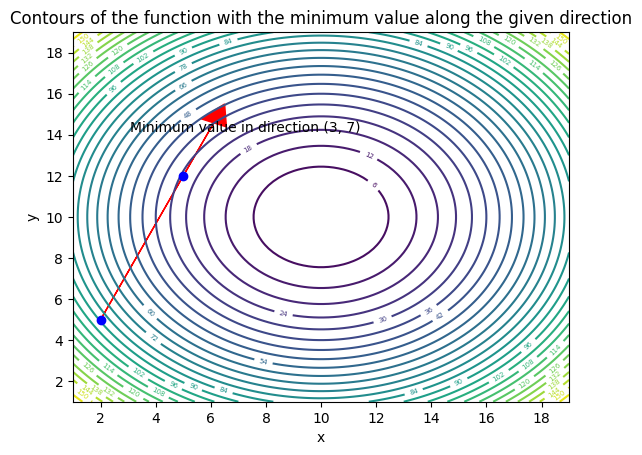

In [36]:
fig, ax = plt.subplots()
plt.clabel(plt.contour(xx,yy,zz,30),fontsize=5)

plt.arrow(x=2,y=5, dx=4.5, dy=10.5,head_width=True,head_length=True,length_includes_head=True,color='red')
plt.plot(2,5,color='blue',marker='o',markersize=6)
plt.plot((w_0+w_m*p)[0],(w_0+w_m*p)[1],color='blue',marker='o',markersize=6)


ax.annotate('Minimum value in direction (3, 7)', xy=(w[0], w[1]), xytext=(w[0]-2, w[1]+2))
            
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contours of the function with the minimum value along the given direction')
plt.show()


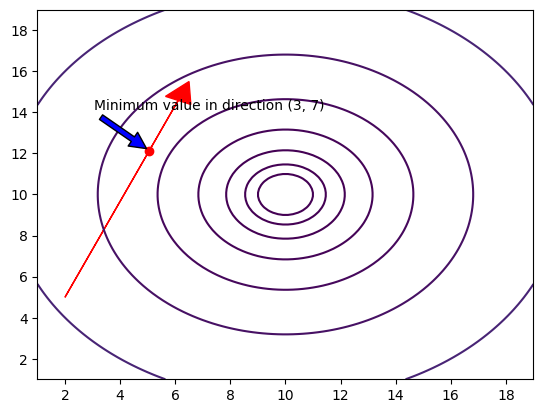

In [37]:
# second contor plot
fig, ax = plt.subplots()
ax.contour(xx, yy, zz, levels=np.logspace(0, 3, 10))
ax.plot(w[0], w[1], 'ro')
plt.arrow(x=2,y=5, dx=4.5, dy=10.5,head_width=True,head_length=True,length_includes_head=True,color='red')
ax.annotate('Minimum value in direction (3, 7)', xy=(w[0], w[1]), xytext=(w[0]-2, w[1]+2),
            arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()

# QUESTION - 2

(2) Using steepest gradient descent, find the local minimum for the function in the problem 1 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction. 

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2
def J(w):
    w1, w2 = w[0], w[1]
    return (w1 - 10)**2 + (w2 - 10)**2

# Define the gradient of J
def grad_J(w):
    w1, w2 = w[0], w[1]
    return np.array([2 * (w1 - 10), 2 * (w2 - 10)])

In [73]:
def LineSearch(J,grad_J,w0,iterations=200,tolerance=10**-4):
    x=np.linspace(1.5,30,5000)
    y=np.linspace(1.5,30,5000)
    xx,yy=np.meshgrid(x,y)
    zz=f(np.array([xx,yy]))
    cp=plt.contour(xx,yy,zz,30,cmap='jet',levels=np.logspace(0, 2, 10))
    plt.clabel(cp,fontsize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plots')
    k=0
    w_0=w0
    for k in range(iterations):
        if np.linalg.norm(gradf(w_0))>tolerance:
            StepL=0.1
            while J(w_0-StepL*gradf(w_0))>J(w_0)-0.0001*StepL*np.linalg.norm(grad_J(w_0)):   #Calculating Step length
                StepL=StepL/2
                #print('Updated')
            p=-grad_J(w_0)
            plt.plot([w_0[0],(w_0+StepL*p)[0]], [w_0[1],(w_0+StepL*p)[1]], linestyle="-")
            plt.plot(w_0[0],w_0[1],color='red',marker='*',markersize=4)
            w_0=w_0+StepL*p
    plt.annotate('Minimum value in Linear search', xy=(w_0[0], w_0[1]), xytext=(w_0[0]-3, w_0[1]+3),
            arrowprops=dict(facecolor='red',shrink=0.05))
    plt.show()
    print(f'minimum value will be: {J(w_0)} at {w_0} Number of iterations: {k}' )
    return w_0,J(w_0)
 

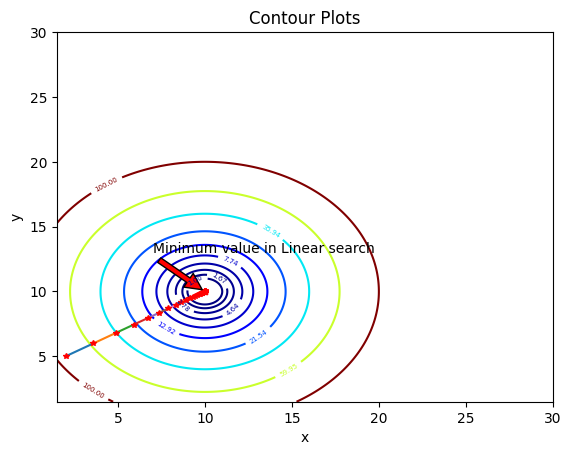

minimum value will be: 2.463732886659207e-09 at [9.99995791 9.99997369] Number of iterations: 199


In [74]:
value=LineSearch(J,grad_J,w0=np.array([2,5]) )

In [83]:
def SteepestDescent(J,grad_J,initialGuess=np.array([0,0]),iterations=200,tolerance=10**-5,StepL=1):

    
    x=np.linspace(1.5,30,5000)
    y=np.linspace(1.5,30,5000)
    xx,yy=np.meshgrid(x,y)
    zz=f(np.array([xx,yy]))
    cp=plt.contour(xx,yy,zz,30,cmap='jet',levels=np.logspace(0, 2, 10))
    
    plt.clabel(cp,fontsize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plots')
    k=0
    w_0=initialGuess
    for k in range(iterations):
        if np.linalg.norm(grad_J(w_0))>tolerance:
            p=-grad_J(w_0)
            plt.plot([w_0[0],(w_0+StepL*p)[0]], [w_0[1],(w_0+StepL*p)[1]], linestyle="-")
            plt.plot(w_0[0],w_0[1],color='red',marker='*',markersize=4)
            w_0=w_0+StepL*p
            
    plt.annotate('Minimum value in Stepest descent direction', xy=(w_0[0], w_0[1]), xytext=(w_0[0]-3, w_0[1]+3),
        arrowprops=dict(facecolor='green',shrink=0.05))
    plt.show()
    print(f'minimum value will be: {J(w_0)} at {w_0} Number of iterations: {k}' )
    return w_0,J(w_0)

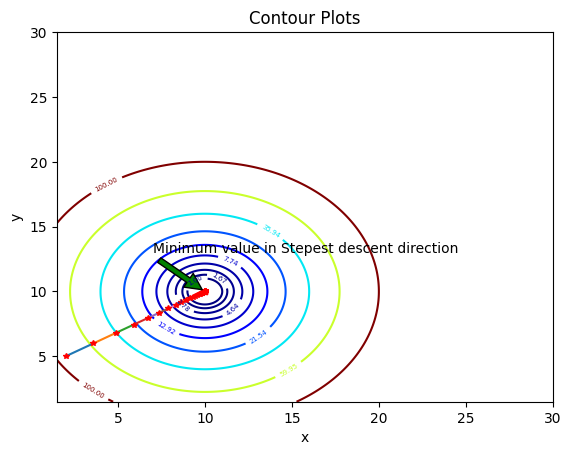

minimum value will be: 2.244338272332165e-11 at [9.99999598 9.99999749] Number of iterations: 199


In [84]:
value=SteepestDescent(J,grad_J,initialGuess=w_0,StepL=1/10)